In [1]:
import numpy as np
import numpy.ma as ma

import pandas as pd
import glob
import scipy
import copy

#plotting with Cartopy. 
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import cm
from matplotlib import rc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('font',**{'family':'serif','serif':['Times']})
# rc('text', usetex=True)

import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import scipy
from datetime import datetime
import os
import importlib

from eofs.xarray import Eof

#filtering tool: 
from scipy.signal import butter
from scipy import signal
import glob

import scipy.io as sio
import scipy.fftpack as fftpack

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import xarray as xr

import scipy as sp
import scipy.ndimage
from scipy.stats import bootstrap

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
######
from windspharm.xarray import VectorWind
# from windspharm.standard import VectorWind
from windspharm.examples import example_data_path
from windspharm.tools import prep_data, recover_data, order_latdim
from windspharm.tools import prep_data, recover_data
import spharm.spharm

In [2]:
def conf_int_pcs(DS,state):
    bbm = []
    bbp = []
    rlow=[]
    rhigh=[]
    PNA_dats_plus = DS.time_PNA_plus
    if state =='high':
        dingo_dats = PNA_dats_plus
    if state=='low':
        dingo_dats = PNA_dats_minus
    for ii in range(-40,40):
        get_dt_list_pos = dingo_dats+np.timedelta64(ii,'D')
        get_dt_list_pos = get_dt_list_pos[pd.DatetimeIndex(get_dt_list_pos).year >= 1982]
        get_dt_list_pos = get_dt_list_pos[pd.DatetimeIndex(get_dt_list_pos).year <= 2010]
        bbp.append(DS.sel(time=get_dt_list_pos.values)['pc_low'].mean().values)
        das = DS.sel(time=get_dt_list_pos.values)['pc_low'].values
        res = bootstrap((das,), np.mean, confidence_level=0.8, random_state=42)
        rlow.append(res.confidence_interval.low)
        rhigh.append(res.confidence_interval.high)
    return rlow,rhigh

In [3]:
DS_stoch_0=xr.open_dataset('/glade/work/wchapman/DA_ML/notebooks/Figures/StreamFunction_Tendency/Figures_out/NAO//NAO_TAN_proj_and_pcs_f.e21.DAcompset.f09_d025_Seasonal_DA_stochai_UV_00_1982.nc')
DS_stoch_05=xr.open_dataset('/glade/work/wchapman/DA_ML/notebooks/Figures/StreamFunction_Tendency/Figures_out/NAO//NAO_TAN_proj_and_pcs_f.e21.DAcompset.f09_d025_Seasonal_stochai_UV_05_1982_MJO_v3.nc')
DS_DA=xr.open_dataset('/glade/work/wchapman/DA_ML/notebooks/Figures/StreamFunction_Tendency/Figures_out/NAO//NAO_TAN_proj_and_pcs_f.e21.DAcompset.f09_d025_Seasonal_DA_stochai_UV_00_1982.nc')
DS_free=xr.open_dataset('/glade/work/wchapman/DA_ML/notebooks/Figures/StreamFunction_Tendency/Figures_out/NAO//NAO_TAN_proj_and_pcs_f.e21.DAcompset.f09_d025_free_MJO_1982.nc')
DS_ERA=xr.open_dataset('/glade/work/wchapman/DA_ML/notebooks/Figures/StreamFunction_Tendency/Figures_out/NAO/NAO_TAN_proj_and_pcs_ERAi.h1.nc')

## Bootstrap this:

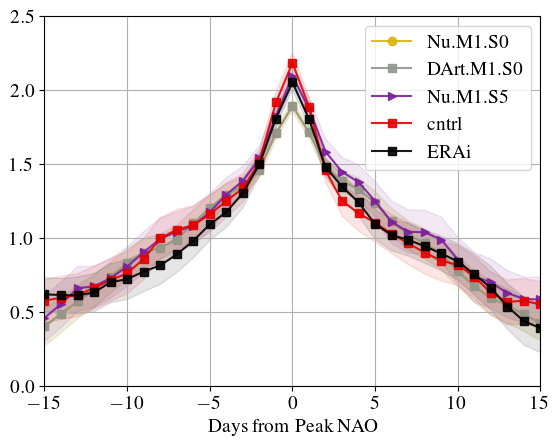

In [46]:
DS_stoch_0['pc_low']
PNA_dats_plus = DS_stoch_0.time_PNA_plus
rlow_stoch0,rhigh_stoch0 = conf_int_pcs(DS_stoch_0,'high')
rlow_stoch5,rhigh_stoch5 = conf_int_pcs(DS_stoch_05,'high')
rlow_DA,rhigh_DA = conf_int_pcs(DS_DA,'high')
rlow_free,rhigh_free = conf_int_pcs(DS_free,'high')
rlow_ERA,rhigh_ERA = conf_int_pcs(DS_ERA,'high')

plt.plot(np.arange(-40,40),np.array(DS_stoch_0['Pos_pc']),color='xkcd:gold',marker='o',alpha=0.9, label='Nu.M1.S0')
plt.fill_between(np.arange(-40,40),rlow_stoch0,rhigh_stoch0,color='xkcd:gold',alpha=0.1)

plt.plot(np.arange(-40,40),np.array(DS_DA['Pos_pc']),color='xkcd:grey',marker='s',alpha=0.9, label='DArt.M1.S0')
plt.fill_between(np.arange(-40,40),rlow_DA,rhigh_DA,color='xkcd:grey',alpha=0.1)

plt.plot(np.arange(-40,40),np.array(DS_stoch_05['Pos_pc']),color='xkcd:purple',marker='>',alpha=0.9, label='Nu.M1.S5')
plt.fill_between(np.arange(-40,40),rlow_stoch5,rhigh_stoch5,color='xkcd:purple',alpha=0.1)

plt.plot(np.arange(-40,40),np.array(DS_free['Pos_pc']),color='xkcd:red',marker='s',alpha=0.9, label='cntrl')
plt.fill_between(np.arange(-40,40),rlow_free,rhigh_free,color='xkcd:red',alpha=0.1)

plt.plot(np.arange(-40,40),np.array(DS_ERA['Pos_pc']),color='xkcd:black',marker='s',alpha=0.9, label='ERAi')
plt.fill_between(np.arange(-40,40),rlow_ERA,rhigh_ERA,color='xkcd:black',alpha=0.1)


plt.grid(True)
plt.xlim([-15,15])
plt.ylim([0,2.5])
plt.xlabel('Days from Peak NAO',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
sv_path='/glade/work/wchapman/DA_ML/notebooks/Figures/StreamFunction_Tendency/Figures_out/NAO/'
sv_nam = 'PC_by_time.png'
plt.savefig(sv_path+sv_nam, dpi=200,bbox_inches='tight')
plt.show()

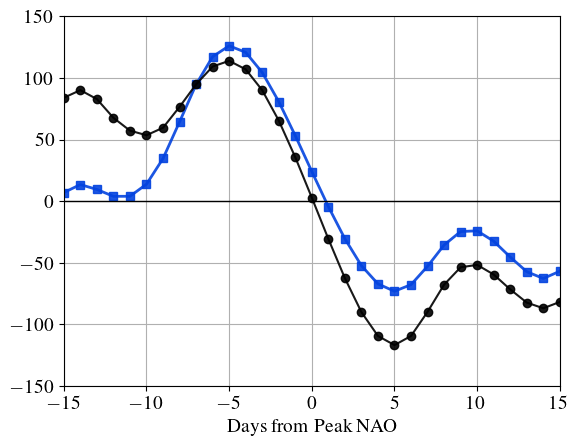

In [4]:
comp_tot_DA = (DS_DA['t1_tan_plus']+DS_DA['t2_tan_plus']+DS_DA['t3_tan_plus'])
comp_tot_stoch_0 = (DS_stoch_0['t1_tan_plus']+DS_stoch_0['t2_tan_plus']+DS_stoch_0['t3_tan_plus'])
comp_tot_stoch_05 = (DS_stoch_05['t1_tan_plus']+DS_stoch_05['t2_tan_plus']+DS_stoch_05['t3_tan_plus'])
comp_tot_free = (DS_free['t1_tan_plus']+DS_free['t2_tan_plus']+DS_free['t3_tan_plus'])
comp_tot_ERA = (DS_ERA['t1_tan_plus']+DS_ERA['t2_tan_plus']+DS_ERA['t3_tan_plus'])
comp_actual = (DS_free['term_tend_plus']+DS_DA['term_tend_plus']+DS_stoch_0['term_tend_plus']+DS_stoch_05['term_tend_plus']+DS_ERA['term_tend_plus'])

comp_tot_DA_L = (DS_DA['t3_tan_plus'])
comp_tot_stoch_0_L = (DS_stoch_0['t3_tan_plus'])
comp_tot_stoch_05_L = (DS_stoch_05['t3_tan_plus'])
comp_tot_free_L = (DS_free['t3_tan_plus'])
comp_tot_ERA_L = (DS_ERA['t3_tan_plus'])


comp_tot_DA_NL = (DS_DA['t1_tan_plus']+DS_DA['t2_tan_plus'])
comp_tot_stoch_0_NL = (DS_stoch_0['t1_tan_plus']+DS_stoch_0['t2_tan_plus'])
comp_tot_stoch_05_NL = (DS_stoch_05['t1_tan_plus']+DS_stoch_05['t2_tan_plus'])
comp_tot_free_NL = (DS_free['t1_tan_plus']+DS_free['t2_tan_plus'])
comp_tot_ERA_NL = (DS_ERA['t1_tan_plus']+DS_ERA['t2_tan_plus'])


# plt.plot(np.arange(-40,40),((comp_tot_DA_L*1+comp_tot_stoch_0_L+comp_tot_stoch_05_L+comp_tot_free_L+comp_tot_ERA_L)*1e7)/5,label='Linear',linewidth=2,color='xkcd:purple',marker='o',alpha=0.4)
# plt.plot(np.arange(-40,40),((comp_tot_DA_NL*1+comp_tot_stoch_0_NL+comp_tot_stoch_05_NL+comp_tot_free_NL+comp_tot_ERA_NL)*1e7)/5,label='Nonlinear',linewidth=2,color='xkcd:gold',marker='o',alpha=0.4)

# plt.plot(np.arange(-40,40),((comp_tot_DA*1+comp_tot_stoch_0+comp_tot_stoch_05+comp_tot_free+comp_tot_ERA)*1e7)/5,label='Estimated',color='r',linestyle='--',linewidth=3,alpha=0.9)
# plt.plot(np.arange(-40,40),((comp_actual)*1e7)/5,label='Actual',color='k',linestyle='-',linewidth=3,alpha=0.9)
# plt.plot(np.arange(-40,40),0*np.arange(-40,40),color='k',linestyle='-',linewidth=1,alpha=1)

# plt.plot(np.arange(-40,40),((comp_tot_DA_L*1+comp_tot_stoch_0_L+comp_tot_stoch_05_L+comp_tot_free_L+comp_tot_ERA_L)*10e7)/5,label='Linear',linewidth=4,color='xkcd:purple',alpha=0.4)
# plt.plot(np.arange(-40,40),((comp_tot_DA_NL*1+comp_tot_stoch_0_NL+comp_tot_stoch_05_NL+comp_tot_free_NL+comp_tot_ERA_NL)*10e7)/5,label='Nonlinear',linewidth=4,color='xkcd:gold',alpha=0.4)

plt.plot(np.arange(-40,40),((comp_tot_DA*1+comp_tot_stoch_0+comp_tot_stoch_05+comp_tot_free+comp_tot_ERA)*10e7)/5,label='Estimated',color='xkcd:blue',marker='s',linewidth=2,alpha=0.9)
plt.plot(np.arange(-40,40),((comp_actual)*10e7)/5,label='Actual',color='xkcd:black',marker='o',alpha=0.9)
plt.plot(np.arange(-40,40),0*np.arange(-40,40),color='k',linestyle='-',linewidth=1,alpha=1)



plt.xlim([-15,15])
plt.ylim([-150,150])
plt.grid(True)
plt.xlabel('Days from Peak NAO',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.legend(fontsize=14)
sv_path='/glade/work/wchapman/DA_ML/notebooks/Figures/StreamFunction_Tendency/Figures_out/NAO/'
sv_nam = 'Stend_Est_nolegend.png'
plt.savefig(sv_path+sv_nam, dpi=200,bbox_inches='tight')
plt.show()

In [5]:
DS_stoch_0=xr.open_dataset('/glade/work/wchapman/DA_ML/notebooks/Figures/StreamFunction_Tendency/Figures_out/NAO//NAO_proj_and_pcs_f.e21.DAcompset.f09_d025_Seasonal_DA_stochai_UV_00_1982.nc')
DS_stoch_05=xr.open_dataset('/glade/work/wchapman/DA_ML/notebooks/Figures/StreamFunction_Tendency/Figures_out/NAO//NAO_proj_and_pcs_f.e21.DAcompset.f09_d025_Seasonal_stochai_UV_05_1982_MJO_v3.nc')
DS_DA=xr.open_dataset('/glade/work/wchapman/DA_ML/notebooks/Figures/StreamFunction_Tendency/Figures_out/NAO//NAO_proj_and_pcs_f.e21.DAcompset.f09_d025_Seasonal_DA_stochai_UV_00_1982.nc')
DS_free=xr.open_dataset('/glade/work/wchapman/DA_ML/notebooks/Figures/StreamFunction_Tendency/Figures_out/NAO//NAO_proj_and_pcs_f.e21.DAcompset.f09_d025_free_MJO_1982.nc')
DS_ERA=xr.open_dataset('/glade/work/wchapman/DA_ML/notebooks/Figures/StreamFunction_Tendency/Figures_out/NAO/NAO_proj_and_pcs_ERAi.h1.nc')

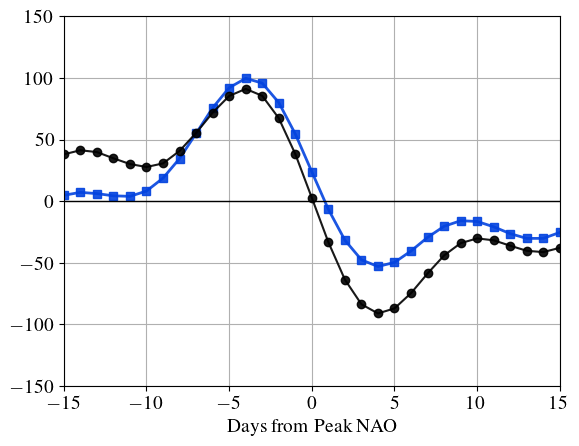

In [6]:
comp_tot_DA = (DS_DA['t1_tan_plus']+DS_DA['t2_tan_plus']+DS_DA['t3_tan_plus'])
comp_tot_stoch_0 = (DS_stoch_0['t1_tan_plus']+DS_stoch_0['t2_tan_plus']+DS_stoch_0['t3_tan_plus'])
comp_tot_stoch_05 = (DS_stoch_05['t1_tan_plus']+DS_stoch_05['t2_tan_plus']+DS_stoch_05['t3_tan_plus'])
comp_tot_free = (DS_free['t1_tan_plus']+DS_free['t2_tan_plus']+DS_free['t3_tan_plus'])
comp_tot_ERA = (DS_ERA['t1_tan_plus']+DS_ERA['t2_tan_plus']+DS_ERA['t3_tan_plus'])
comp_actual = (DS_free['term_tend_plus']+DS_DA['term_tend_plus']+DS_stoch_0['term_tend_plus']+DS_stoch_05['term_tend_plus']+DS_ERA['term_tend_plus'])

comp_tot_DA_L = (DS_DA['t3_tan_plus'])
comp_tot_stoch_0_L = (DS_stoch_0['t3_tan_plus'])
comp_tot_stoch_05_L = (DS_stoch_05['t3_tan_plus'])
comp_tot_free_L = (DS_free['t3_tan_plus'])
comp_tot_ERA_L = (DS_ERA['t3_tan_plus'])


comp_tot_DA_NL = (DS_DA['t1_tan_plus']+DS_DA['t2_tan_plus'])
comp_tot_stoch_0_NL = (DS_stoch_0['t1_tan_plus']+DS_stoch_0['t2_tan_plus'])
comp_tot_stoch_05_NL = (DS_stoch_05['t1_tan_plus']+DS_stoch_05['t2_tan_plus'])
comp_tot_free_NL = (DS_free['t1_tan_plus']+DS_free['t2_tan_plus'])
comp_tot_ERA_NL = (DS_ERA['t1_tan_plus']+DS_ERA['t2_tan_plus'])


# plt.plot(np.arange(-40,40),((comp_tot_DA_L*1+comp_tot_stoch_0_L+comp_tot_stoch_05_L+comp_tot_free_L+comp_tot_ERA_L)*1e7)/5,label='Linear',linewidth=2,color='xkcd:purple',marker='o',alpha=0.4)
# plt.plot(np.arange(-40,40),((comp_tot_DA_NL*1+comp_tot_stoch_0_NL+comp_tot_stoch_05_NL+comp_tot_free_NL+comp_tot_ERA_NL)*1e7)/5,label='Nonlinear',linewidth=2,color='xkcd:gold',marker='o',alpha=0.4)

# plt.plot(np.arange(-40,40),((comp_tot_DA*1+comp_tot_stoch_0+comp_tot_stoch_05+comp_tot_free+comp_tot_ERA)*1e7)/5,label='Estimated',color='r',linestyle='--',linewidth=3,alpha=0.9)
# plt.plot(np.arange(-40,40),((comp_actual)*1e7)/5,label='Actual',color='k',linestyle='-',linewidth=3,alpha=0.9)
# plt.plot(np.arange(-40,40),0*np.arange(-40,40),color='k',linestyle='-',linewidth=1,alpha=1)

# plt.plot(np.arange(-40,40),((comp_tot_DA_L*1+comp_tot_stoch_0_L+comp_tot_stoch_05_L+comp_tot_free_L+comp_tot_ERA_L)*10e7)/5,label='Linear',linewidth=4,color='xkcd:purple',alpha=0.4)
# plt.plot(np.arange(-40,40),((comp_tot_DA_NL*1+comp_tot_stoch_0_NL+comp_tot_stoch_05_NL+comp_tot_free_NL+comp_tot_ERA_NL)*10e7)/5,label='Nonlinear',linewidth=4,color='xkcd:gold',alpha=0.4)

plt.plot(np.arange(-40,40),((comp_tot_DA*1+comp_tot_stoch_0+comp_tot_stoch_05+comp_tot_free+comp_tot_ERA)*10e7)/5,label='Estimated',color='xkcd:blue',marker='s',linewidth=2,alpha=0.9)
plt.plot(np.arange(-40,40),((comp_actual)*10e7)/5,label='Actual',color='xkcd:black',marker='o',alpha=0.9)
plt.plot(np.arange(-40,40),0*np.arange(-40,40),color='k',linestyle='-',linewidth=1,alpha=1)



plt.xlim([-15,15])
plt.ylim([-150,150])
plt.grid(True)
plt.xlabel('Days from Peak NAO',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.legend(fontsize=14)
sv_path='/glade/work/wchapman/DA_ML/notebooks/Figures/StreamFunction_Tendency/Figures_out/NAO/'
sv_nam = 'Stend_Est_nolegend.png'
plt.savefig(sv_path+sv_nam, dpi=200,bbox_inches='tight')
plt.show()

In [41]:
sv_path='/glade/work/wchapman/DA_ML/notebooks/Figures/StreamFunction_Tendency/Figures_out/NAO/'

In [21]:
# comp_tot_DA = (DS_DA['t3_tan_plus']+DS_DA['t5_plus']+DS_DA['t6_plus']+DS_DA['t7_plus'])

# comp_tot_stoch0 = (DS_stoch_0['t3_tan_plus']+DS_stoch_0['t5_plus']+DS_stoch_0['t6_plus']+DS_stoch_0['t7_plus'])

# comp_tot_stoch05 = (DS_stoch_05['t3_tan_plus']+DS_stoch_05['t5_plus']+DS_stoch_05['t6_plus']+DS_stoch_05['t7_plus'])

# comp_tot_free =  (DS_free['t3_tan_plus']+DS_free['t5_plus']+DS_free['t6_plus']+DS_free['t7_plus'])

# comp_tot_ERA =  (DS_ERA['t3_tan_plus']+DS_ERA['t5_plus']+DS_ERA['t6_plus']+DS_ERA['t7_plus'])
         

# plt.plot(np.arange(-40,40),(comp_tot_DA)/np.max(np.abs(comp_tot_DA)),color='xkcd:black',marker='o',alpha=0.9, label='DA')
# plt.plot(np.arange(-40,40),(comp_tot_stoch0)/np.max(np.abs(comp_tot_stoch0)),color='xkcd:blue',marker='s',alpha=0.9, label='Stoch0')
# plt.plot(np.arange(-40,40),(comp_tot_stoch05)/np.max(np.abs(comp_tot_stoch05)),color='xkcd:red',alpha=0.3,linewidth=4,label='Stoch5')
# plt.plot(np.arange(-40,40),(comp_tot_free)/np.max(np.abs(comp_tot_free)),color='xkcd:purple',alpha=0.3,linewidth=4,label='Free')
# plt.plot(np.arange(-40,40),(comp_tot_ERA)/np.max(np.abs(comp_tot_ERA)),color='xkcd:green',alpha=0.3,linewidth=4,label='bop')

# # plt.plot(np.arange(-40,40),comp6,color='xkcd:black',marker='s',alpha=0.99,linewidth=5)

# plt.grid(True)
# plt.xlim([-25,25])
# # plt.ylim([0,2.5])
# plt.title('Composite of Estimated Tendency (Positive PNA Events)')
# plt.xlabel('Days from Peak PNA')
# plt.ylabel('PC Val')
# plt.legend()
# plt.show()

In [22]:
# tdo = 't6_minus'

# comp6 = (np.array(DS_stoch_0[tdo])+np.array(DS_DA[tdo])+np.array(DS_stoch_05[tdo])+np.array(DS_free[tdo]))/4
# plt.plot(np.arange(-40,40),np.array(DS_stoch_0[tdo]),color='xkcd:black',marker='o',alpha=0.4, label='Nudge')
# plt.plot(np.arange(-40,40),np.array(DS_DA[tdo]),color='xkcd:blue',marker='s',alpha=0.4, label='DA')
# plt.plot(np.arange(-40,40),np.array(DS_stoch_05[tdo]),color='xkcd:red',marker='>',alpha=0.4, label='Stoch')
# plt.plot(np.arange(-40,40),np.array(DS_free[tdo]),color='xkcd:purple',marker='s',alpha=0.4, label='Free')

# # plt.plot(np.arange(-40,40),comp6,color='xkcd:black',marker='s',alpha=0.99,linewidth=5)

# plt.grid(True)
# # plt.xlim([-25,25])
# # plt.ylim([0,2.5])
# plt.title('Composite of PCs (Positive Events)')
# plt.xlabel('Days from Peak PNA')
# plt.ylabel('PC Val')
# plt.legend()
# plt.show()

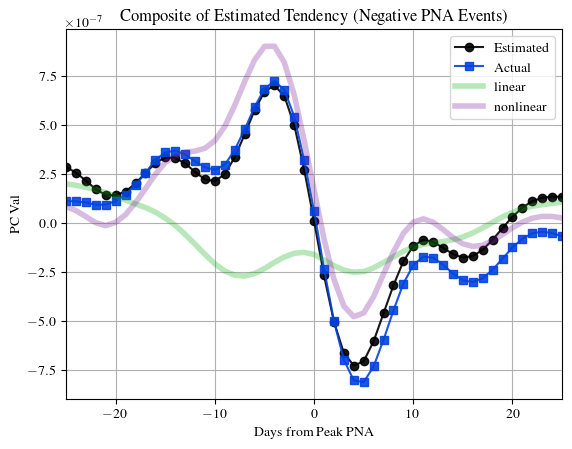

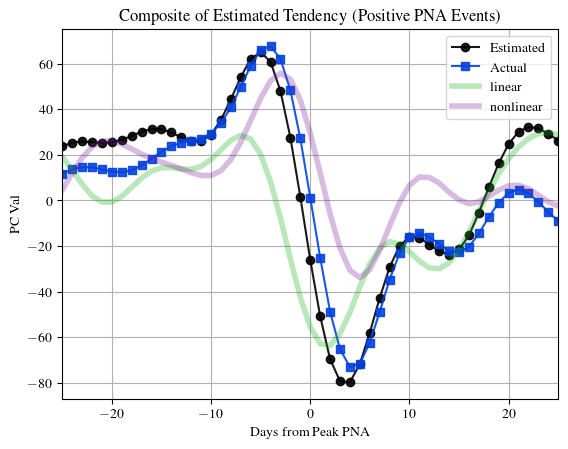

In [117]:
comp_tot = (DS_DA['t3_tan_minus']+DS_DA['t5_minus']+DS_DA['t6_minus']+DS_DA['t7_minus'])+\
           (DS_stoch_0['t3_tan_minus']+DS_stoch_0['t5_minus']+DS_stoch_0['t6_minus']+DS_stoch_0['t7_minus'])+\
           (DS_stoch_05['t3_tan_minus']+DS_stoch_05['t5_minus']+DS_stoch_05['t6_minus']+DS_stoch_05['t7_minus'])+\
           (DS_free['t3_tan_minus']+DS_free['t5_minus']+DS_free['t6_minus']+DS_free['t7_minus'])

comp_tot = (DS_DA['t3_tan_minus']+DS_DA['t5_minus']+DS_DA['t6_minus']+DS_DA['t7_minus'])+\
           (DS_stoch_0['t3_tan_minus']+DS_stoch_0['t5_minus']+DS_stoch_0['t6_minus']+DS_stoch_0['t7_minus'])+\
           (DS_stoch_05['t3_tan_minus']+DS_stoch_05['t5_minus']+DS_stoch_05['t6_minus']+DS_stoch_05['t7_minus'])+\
           (DS_free['t3_tan_minus']+DS_free['t5_minus']+DS_free['t6_minus']+DS_free['t7_minus'])


comp_tot_linear = (DS_DA['t3_tan_minus'])+\
           (DS_stoch_0['t3_tan_minus'])+\
           (DS_stoch_05['t3_tan_minus'])+(DS_free['t3_tan_minus'])

comp_tot_nonlinear = (DS_DA['t5_minus']+DS_DA['t6_minus']+DS_DA['t7_minus'])+\
           (DS_stoch_0['t5_minus']+DS_stoch_0['t6_minus']+DS_stoch_0['t7_minus'])+\
           (DS_stoch_05['t5_minus']+DS_stoch_05['t6_minus']+DS_stoch_05['t7_minus'])+\
           (DS_free['t5_minus']+DS_free['t6_minus']+DS_free['t7_minus'])

comp_real = (DS_DA['term_tend_minus'])+\
           (DS_stoch_0['term_tend_minus'])+\
           (DS_stoch_05['term_tend_minus'])+(DS_free['term_tend_minus'])


plt.plot(np.arange(-40,40),comp_tot/4,color='xkcd:black',marker='o',alpha=0.9, label='Estimated')
plt.plot(np.arange(-40,40),comp_real/4,color='xkcd:blue',marker='s',alpha=0.9, label='Actual')
plt.plot(np.arange(-40,40),comp_tot_linear/4,color='xkcd:green',alpha=0.3,linewidth=4,label='linear')
plt.plot(np.arange(-40,40),comp_tot_nonlinear/4,color='xkcd:purple',alpha=0.3,linewidth=4,label='nonlinear')

# plt.plot(np.arange(-40,40),comp6,color='xkcd:black',marker='s',alpha=0.99,linewidth=5)

plt.grid(True)
plt.xlim([-25,25])
# plt.ylim([0,2.5])
plt.title('Composite of Estimated Tendency (Negative PNA Events)')
plt.xlabel('Days from Peak PNA')
plt.ylabel('PC Val')
plt.legend()
plt.show()


comp_tot = (DS_DA['t3_tan_plus']+DS_DA['t5_plus']+DS_DA['t6_plus']+DS_DA['t7_plus'])+\
           (DS_stoch_0['t3_tan_plus']+DS_stoch_0['t5_plus']+DS_stoch_0['t6_plus']+DS_stoch_0['t7_plus'])+\
           (DS_stoch_05['t3_tan_plus']+DS_stoch_05['t5_plus']+DS_stoch_05['t6_plus']+DS_stoch_05['t7_plus'])+\
           (DS_free['t3_tan_plus']+DS_free['t5_plus']+DS_free['t6_plus']+DS_free['t7_plus'])

comp_tot = (DS_DA['t3_tan_plus']+DS_DA['t5_plus']+DS_DA['t6_plus']+DS_DA['t7_plus'])+\
           (DS_stoch_0['t3_tan_plus']+DS_stoch_0['t5_plus']+DS_stoch_0['t6_plus']+DS_stoch_0['t7_plus'])+\
           (DS_stoch_05['t3_tan_plus']+DS_stoch_05['t5_plus']+DS_stoch_05['t6_plus']+DS_stoch_05['t7_plus'])+\
           (DS_free['t3_tan_plus']+DS_free['t5_plus']+DS_free['t6_plus']+DS_free['t7_plus'])


comp_tot_linear = (DS_DA['t3_tan_plus'])+\
           (DS_stoch_0['t3_tan_plus'])+\
           (DS_stoch_05['t3_tan_plus'])+(DS_free['t3_tan_plus'])

comp_tot_nonlinear = (DS_DA['t5_plus']+DS_DA['t6_plus']+DS_DA['t7_plus'])+\
           (DS_stoch_0['t5_plus']+DS_stoch_0['t6_plus']+DS_stoch_0['t7_plus'])+\
           (DS_stoch_05['t5_plus']+DS_stoch_05['t6_plus']+DS_stoch_05['t7_plus'])+\
           (DS_free['t5_plus']+DS_free['t6_plus']+DS_free['t7_plus'])

comp_real = (DS_DA['term_tend_plus'])+\
           (DS_stoch_0['term_tend_plus'])+\
           (DS_stoch_05['term_tend_plus'])+(DS_free['term_tend_plus'])

plt.plot(np.arange(-40,40),(comp_tot/4)*10e7,color='xkcd:black',marker='o',alpha=0.9, label='Estimated')
plt.plot(np.arange(-40,40),(comp_real/4)*10e7,color='xkcd:blue',marker='s',alpha=0.9, label='Actual')
plt.plot(np.arange(-40,40),(comp_tot_linear/4)*10e7,color='xkcd:green',alpha=0.3,linewidth=4,label='linear')
plt.plot(np.arange(-40,40),(comp_tot_nonlinear/4)*10e7,color='xkcd:purple',alpha=0.3,linewidth=4,label='nonlinear')

# plt.plot(np.arange(-40,40),comp6,color='xkcd:black',marker='s',alpha=0.99,linewidth=5)

plt.grid(True)
plt.xlim([-25,25])
# plt.ylim([0,2.5])
plt.title('Composite of Estimated Tendency (Positive PNA Events)')
plt.xlabel('Days from Peak PNA')
plt.ylabel('PC Val')
plt.legend()
plt.show()

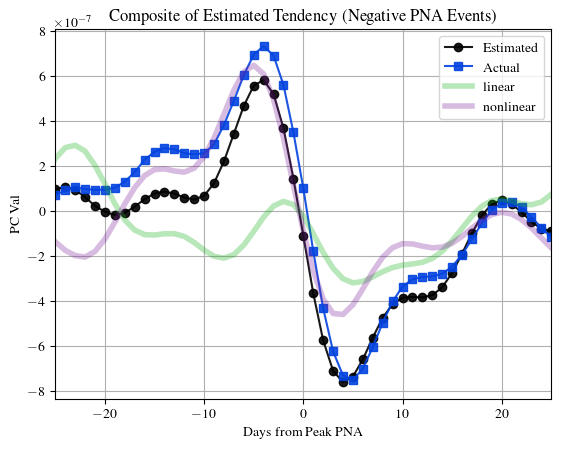

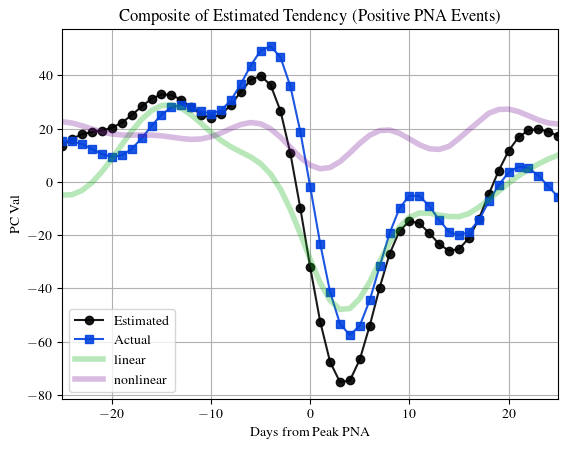

In [122]:
comp_tot = (DS_DA['t3_tan_minus']+DS_DA['t5_minus']+DS_DA['t6_minus']+DS_DA['t7_minus'])+\
           (DS_stoch_0['t3_tan_minus']+DS_stoch_0['t5_minus']+DS_stoch_0['t6_minus']+DS_stoch_0['t7_minus'])

comp_tot = (DS_DA['t3_tan_minus']+DS_DA['t5_minus']+DS_DA['t6_minus']+DS_DA['t7_minus'])+\
           (DS_stoch_0['t3_tan_minus']+DS_stoch_0['t5_minus']+DS_stoch_0['t6_minus']+DS_stoch_0['t7_minus'])


comp_tot_linear = (DS_DA['t3_tan_minus'])+\
           (DS_stoch_0['t3_tan_minus'])

comp_tot_nonlinear = (DS_DA['t5_minus']+DS_DA['t6_minus']+DS_DA['t7_minus'])+\
           (DS_stoch_0['t5_minus']+DS_stoch_0['t6_minus']+DS_stoch_0['t7_minus'])

comp_real = (DS_DA['term_tend_minus'])+\
           (DS_stoch_0['term_tend_minus'])



plt.plot(np.arange(-40,40),comp_tot/2,color='xkcd:black',marker='o',alpha=0.9, label='Estimated')
plt.plot(np.arange(-40,40),comp_real/2,color='xkcd:blue',marker='s',alpha=0.9, label='Actual')
plt.plot(np.arange(-40,40),comp_tot_linear/2,color='xkcd:green',alpha=0.3,linewidth=4,label='linear')
plt.plot(np.arange(-40,40),comp_tot_nonlinear/2,color='xkcd:purple',alpha=0.3,linewidth=4,label='nonlinear')

# plt.plot(np.arange(-40,40),comp6,color='xkcd:black',marker='s',alpha=0.99,linewidth=5)

plt.grid(True)
plt.xlim([-25,25])
# plt.ylim([0,2.5])
plt.title('Composite of Estimated Tendency (Negative PNA Events)')
plt.xlabel('Days from Peak PNA')
plt.ylabel('PC Val')
plt.legend()
plt.show()


comp_tot = (DS_DA['t3_tan_plus']+DS_DA['t5_plus']+DS_DA['t6_plus']+DS_DA['t7_plus'])+\
           (DS_stoch_0['t3_tan_plus']+DS_stoch_0['t5_plus']+DS_stoch_0['t6_plus']+DS_stoch_0['t7_plus'])

comp_tot = (DS_DA['t3_tan_plus']+DS_DA['t5_plus']+DS_DA['t6_plus']+DS_DA['t7_plus'])+\
           (DS_stoch_0['t3_tan_plus']+DS_stoch_0['t5_plus']+DS_stoch_0['t6_plus']+DS_stoch_0['t7_plus'])

comp_tot_linear = (DS_DA['t3_tan_plus'])+\
           (DS_stoch_0['t3_tan_plus'])
          

comp_tot_nonlinear = (DS_DA['t5_plus']+DS_DA['t6_plus']+DS_DA['t7_plus'])+\
           (DS_stoch_0['t5_plus']+DS_stoch_0['t6_plus']+DS_stoch_0['t7_plus'])

comp_tot_nonlinear = DS_DA['t6_plus']+ DS_stoch_0['t6_plus']

comp_real = (DS_DA['term_tend_plus'])+\
           (DS_stoch_0['term_tend_plus'])

plt.plot(np.arange(-40,40),(comp_tot/2)*10e7,color='xkcd:black',marker='o',alpha=0.9, label='Estimated')
plt.plot(np.arange(-40,40),(comp_real/2)*10e7,color='xkcd:blue',marker='s',alpha=0.9, label='Actual')
plt.plot(np.arange(-40,40),(comp_tot_linear/2)*10e7,color='xkcd:green',alpha=0.3,linewidth=4,label='linear')
plt.plot(np.arange(-40,40),(comp_tot_nonlinear/2)*10e7,color='xkcd:purple',alpha=0.3,linewidth=4,label='nonlinear')

# plt.plot(np.arange(-40,40),comp6,color='xkcd:black',marker='s',alpha=0.99,linewidth=5)

plt.grid(True)
plt.xlim([-25,25])
# plt.ylim([0,2.5])
plt.title('Composite of Estimated Tendency (Positive PNA Events)')
plt.xlabel('Days from Peak PNA')
plt.ylabel('PC Val')
plt.legend()
plt.show()